In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Считываем датасет
df = pd.read_csv('bank.csv', sep=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
38533,34,management,single,tertiary,no,2360,yes,no,cellular,15,may,137,2,176,0
38324,30,blue-collar,married,primary,no,714,yes,no,cellular,15,may,199,1,-1,0
35247,28,services,single,secondary,no,6332,yes,no,telephone,7,may,149,1,343,0
8081,51,management,divorced,tertiary,no,6,no,no,unknown,2,jun,193,4,-1,0
19056,59,blue-collar,divorced,primary,no,153,no,no,cellular,5,aug,268,2,-1,0
44932,71,retired,married,secondary,no,1696,no,no,cellular,6,oct,486,1,-1,1
23762,60,management,married,tertiary,no,3029,no,no,cellular,28,aug,26,9,-1,0
12028,55,admin.,divorced,secondary,no,166,no,no,unknown,20,jun,84,4,-1,0
29867,37,services,single,secondary,no,342,yes,no,cellular,4,feb,127,1,273,0
31732,49,entrepreneur,divorced,tertiary,no,1342,yes,yes,cellular,7,apr,253,1,140,0


#### Стандартный синтаксис создания графика

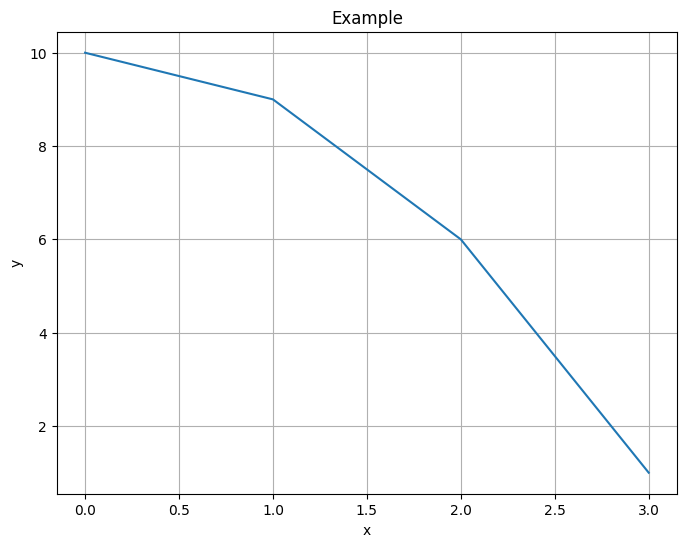

In [4]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

## Виды графиков


### Линейный график

In [5]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403


#### Matplotlib

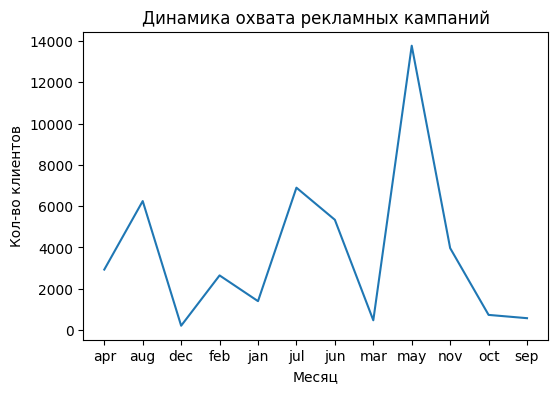

In [6]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

#### Seaborn

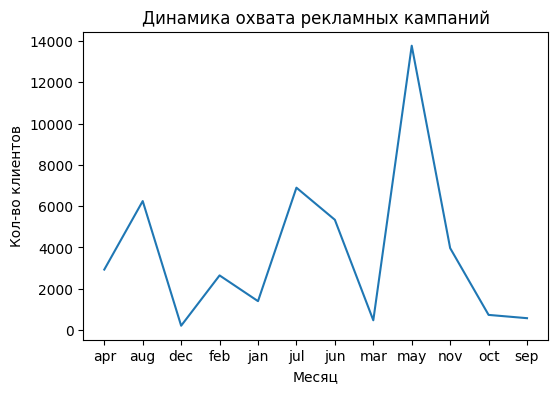

In [7]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

### Гистограмма
#### Matplotlib

Text(0, 0.5, 'Кол-во клиентов')

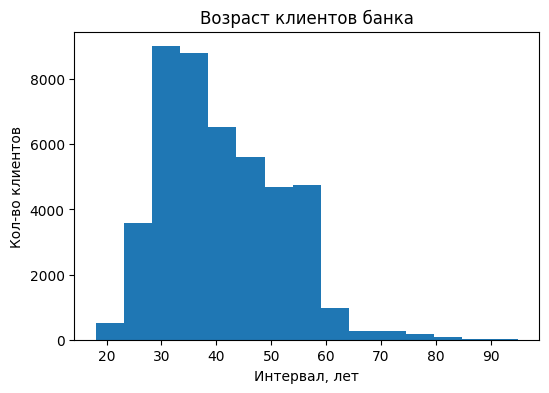

In [8]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

#### Seaborn

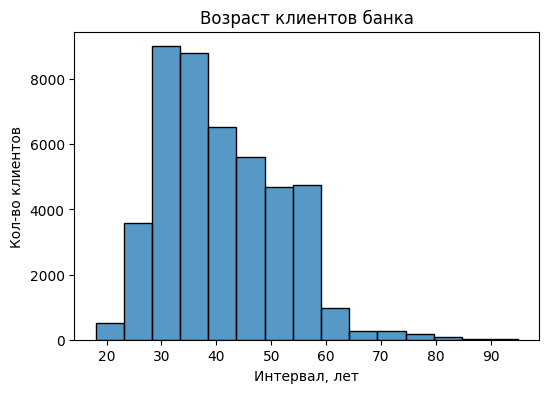

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

### Диаграмма рассеяния

In [10]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


#### Matplotlib

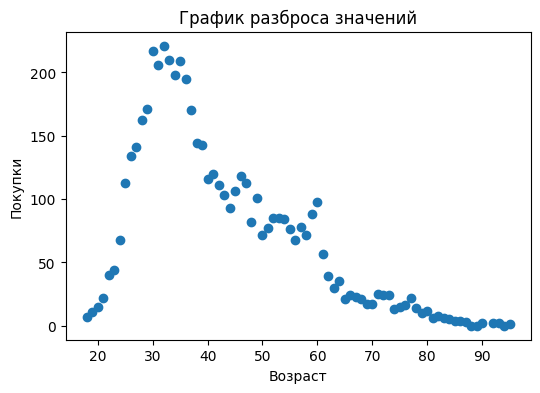

In [11]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

#### Seaborn

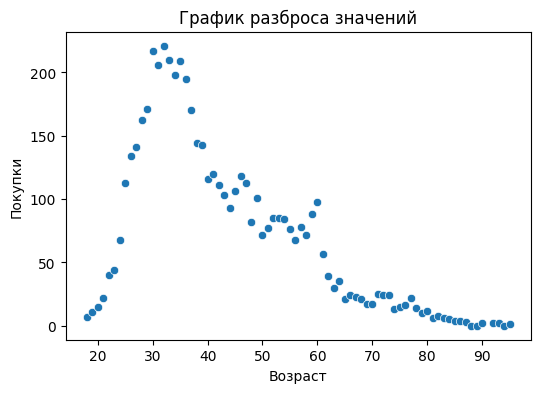

In [12]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

### Столбчатые диаграммы

In [17]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


#### Matplotlib

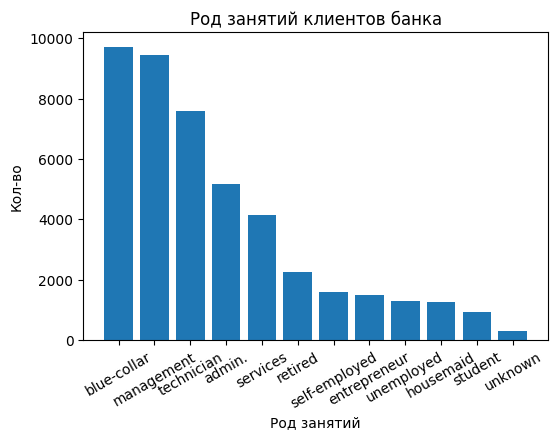

In [18]:
plt.figure(figsize=(6, 4))

plt.bar(data['job'], data['count'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

#### Seaborn

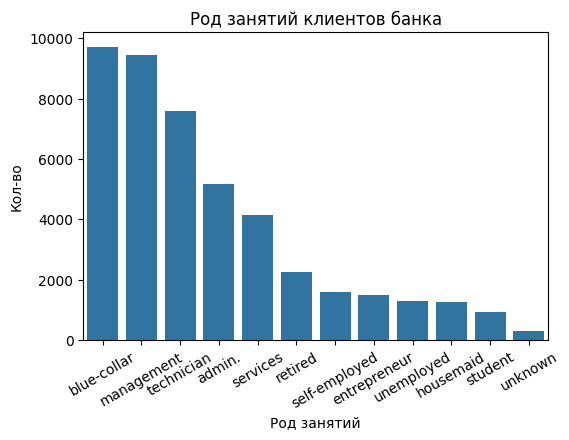

In [19]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['job'], y=data['count'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

### Многорядовые столбчатые диаграммы

In [20]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


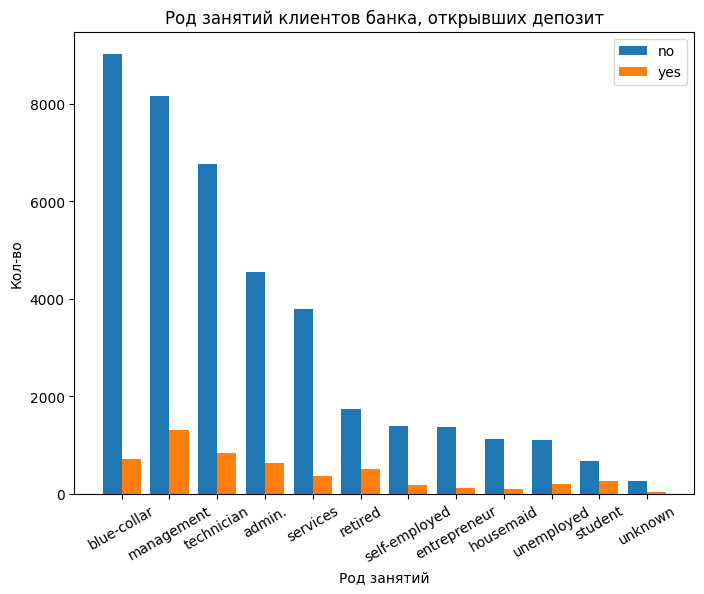

In [21]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

### Сложенная столбчатая диаграмма

In [22]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


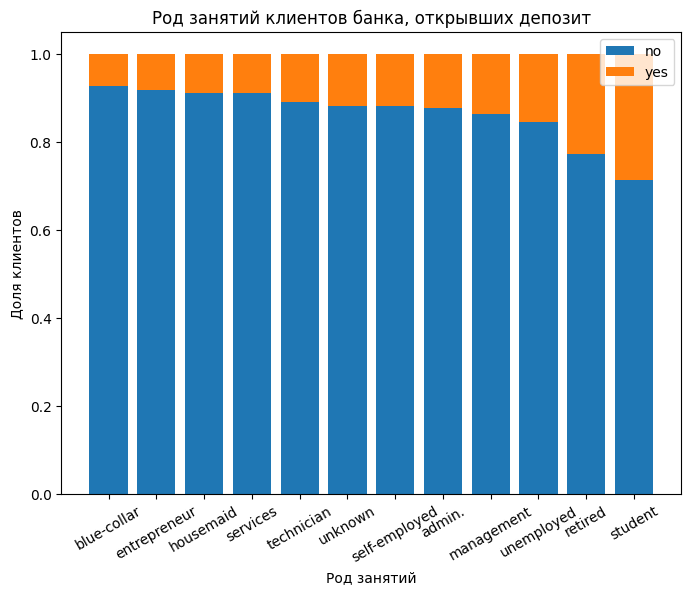

In [23]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

### Ящики с усами

In [32]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

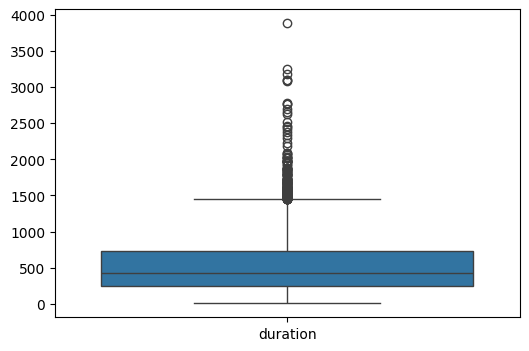

In [33]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

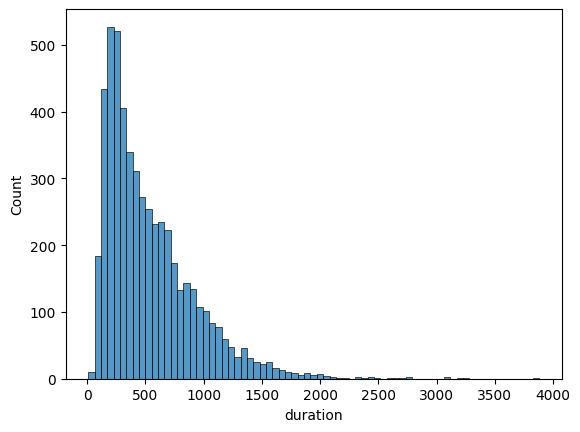

In [34]:
sns.histplot(x=data1);

#### Matplotlib

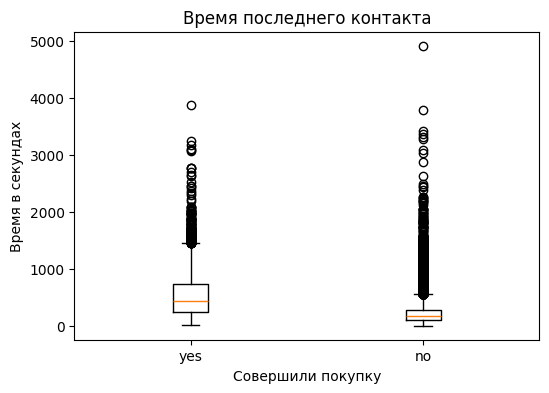

In [35]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

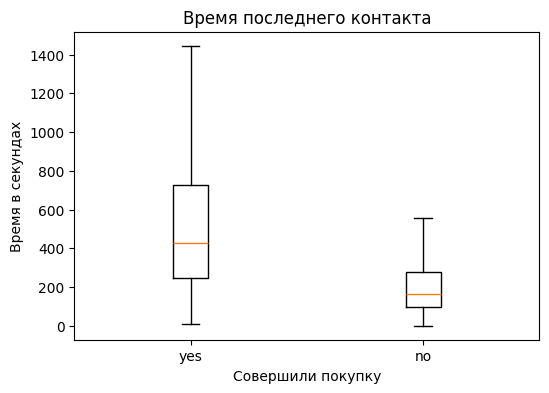

In [58]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

#### Seaborn

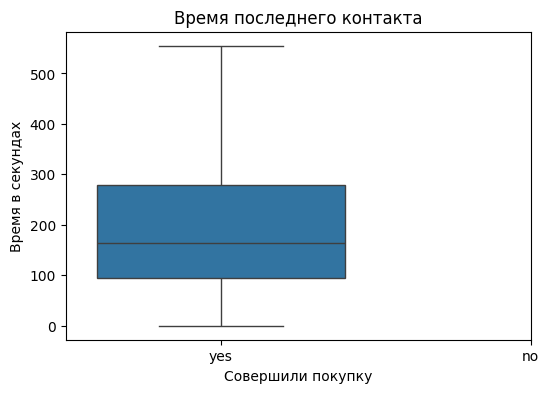

In [70]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data = [data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

### Круговая диаграмма

In [71]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     39922
yes     5289
Name: count, dtype: int64

#### Matplotlib

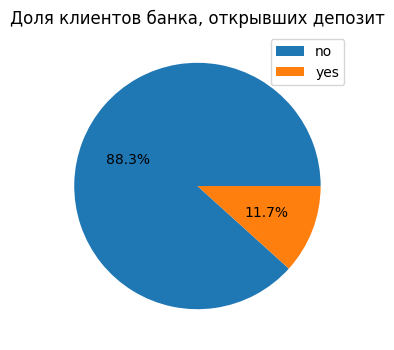

In [72]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

## Визуальный анализ данных
#### Описание датасета
Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

- longitude - долгота
- latitude - широта
- housing_median_age - средний возраст дома
- total_rooms - общее количество комнат
- total_bedrooms - общее количество спален
- population - количество проживающих
- households - домохозяйства
- ocean_proximity - близость океана
- median_income - средний доход
- median_house_value - средняя стоимость дома

In [ ]:
df = pd.read_csv('housing.csv', sep=';')
df.head()

### Распределение вещественных признаков

In [ ]:
# {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [ ]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

In [ ]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

Поиск выбросов с помощью box plot

Как строится box plot

Подробное объяснение

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

Как строятся "усы" - вариантов масса

- среднее +/- 3 сигма (стандартное отклонение)
- min / max
- median +/- 1.5*(q75 - q25),
- ...
*Интерквартильный размах = q75 - q25

In [ ]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

### Анализ категориальных признаков

In [ ]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

In [ ]:
counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

### Анализ взаимных распределений

In [ ]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');

In [ ]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

In [ ]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

Видно два города, имеет смысл посмотреть на зависимость по отдельности

In [ ]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

In [ ]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

longitude

In [ ]:
sns.jointplot(x=df['longitude'], y=df['median_house_value'], kind='reg');

In [ ]:
df_cut = df[df['longitude'] < -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

In [ ]:
df_cut = df[df['longitude'] >= -120]
sns.jointplot(x=df_cut['longitude'], y=df_cut['median_house_value'], kind='reg');

### Категориальные / бинарные признаки
### box plot

In [ ]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

### Матрица корреляций
- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только линейной связи

In [ ]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg');

In [ ]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg');

In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Гео данные

In [74]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

In [ ]:
plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

### Folium

In [ ]:
# !pip install folium

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

### Kepler**

In [ ]:
# !conda install -c conda-forge keplergl
# !pip install keplergl==0.1.1

In [79]:
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md
Map saved to ./california.html!


### Summary
1. Матрица корреляции
2. Знакомство с признаками
- Плотность распределения (sns.distplot/sns.kdeplot/plt.hist - Узнать распределение признака)
- sns.violinplot - Узнать распределение признака
- Столбчатая диаграмма (sns.barplot/plt.bar - Узнать распределение категориального признака)
- Ящик с усами (sns.boxplot/plt.boxplot - Узнать диапазон значений)
- sns.jointplot - Взаимное изменение признаков
- plt.pie - Изобразить долю объектов от всего кол-ва
3. Поиск выбросов
- sns.distplot/sns.kdeplot/plt.hist - Искать хвосты слева и справа
- sns.boxplot - Всё, что выходит за пределы усов - выбросы